In [13]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('combined-160.txt')

In [14]:
import numpy as np

katvec = model['kat']
print(model.most_similar('kat'))
kathond = model.similarity('kat', 'hond')
katmotor = model.similarity('kat', 'motorfiets')
print(kathond, katmotor)

def euclidean_distance(word1, word2):
    vec1 = model[word1]
    vec2 = model[word2]
    return np.linalg.norm(vec1 - vec2)

print(euclidean_distance('kat', 'hond'))

[('hond', 0.8842193484306335), ('aap', 0.8591726422309875), ('konijn', 0.7992514371871948), ('papegaai', 0.790718674659729), ('kater', 0.7878984808921814), ('poedel', 0.7828747034072876), ('teckel', 0.7692196369171143), ('pratende', 0.7677123546600342), ('booswichtenclub', 0.7648507356643677), ('bergleeuw', 0.7583401203155518)]
0.8842193 0.27856767
0.48120818


In [22]:
import pandas as pd

vft_data = pd.read_csv('thesis_data_clean.csv', sep=';')

#excluded_participants = ['sub_005', 'sub_012', 'sub_016', 'sub_018', 'sub_023', 'sub_034', 'sub_037', 'sub_039', 'sub_040', 'sub_041']
#vft_data = vft_data[~vft_data['Participant Id'].isin(excluded_participants)]

omitted_words_animals = 0
omitted_words_professions = 0

def avg_distance(wlist):
    
    wlist_lower = [w.lower() for w in wlist]

    #get rid of words that do not have word2vec embedding
    omitted_words = 0
    #included_words = 0

    wlist_valid = []
    for w in wlist_lower:
        try:
            vecw = model[w]
            wlist_valid.append(w)
        except KeyError:
            print('KeyError')
            omitted_words += 1

    print(wlist_valid)
    distance_total = 0
    for i in range(len(wlist_valid)-1):
        distance_total += euclidean_distance(wlist_valid[i], wlist_valid[i+1])
    return distance_total/(len(wlist_valid)-1), omitted_words

def score(wlist):
    return len(wlist)

avg_distances_animals = []
avg_distances_professions = []

scores_animals = []
scores_professions = []

for wordlist in vft_data['CF_animals']:
    print(wordlist)
    wordlist_split = wordlist.split(', ')
    #print(avg_distance(wordlist_split))

    avg_dist, omitted_words = avg_distance(wordlist_split)
    avg_distances_animals.append(avg_dist)
    omitted_words_animals += omitted_words
    scores_animals.append(score(wordlist_split))

for wordlist in vft_data['CF_professions']:
    wordlist_split = wordlist.split(', ')
    avg_dist, omitted_words = avg_distance(wordlist_split)
    avg_distances_professions.append(avg_dist)
    omitted_words_professions += omitted_words
    scores_professions.append(score(wordlist_split))

#counting total words
total_words_animals = 0
for wordlist in vft_data['CF_animals']:
    wordlist_split = wordlist.split(', ')
    total_words_animals += len(wordlist_split)

total_words_professions = 0
for wordlist in vft_data['CF_professions']:
    wordlist_split = wordlist.split(', ')
    total_words_professions += len(wordlist_split)

print('Omitted words in animal category:', omitted_words_animals)
print('Fraction of total words:', omitted_words_animals/total_words_animals)
print('Omitted words in profession category:', omitted_words_professions)
print('Fraction of total words:', omitted_words_professions/total_words_professions)

# avg_distances_combined = [(a+p)/2 for a, p in zip(avg_distances_animals, avg_distances_professions)]

Aap, paard, dromedaris, slang, gans, steenbok, tijger, leeuw, gazelle, hert, eland, rat, muis, mus, meeuw, muskusrat, marter, krokodil, olifant, neushoorn, miereneter, rendier, kat, fret, katfret, ijsbeer, bruine beer, merel
KeyError
['aap', 'paard', 'dromedaris', 'slang', 'gans', 'steenbok', 'tijger', 'leeuw', 'gazelle', 'hert', 'eland', 'rat', 'muis', 'mus', 'meeuw', 'muskusrat', 'marter', 'krokodil', 'olifant', 'neushoorn', 'miereneter', 'rendier', 'kat', 'fret', 'katfret', 'ijsbeer', 'merel']
Kat, hond, vis, vleermuis, giraffe, neushoorn, buffel, aap, maki, stokstaartje, prairiehond, karper, wezel, mot, mier, rups, schildpad, eland, hert, antilope, vos, wolf, tijger, beer, wasbeer, vlinder
['kat', 'hond', 'vis', 'vleermuis', 'giraffe', 'neushoorn', 'buffel', 'aap', 'maki', 'stokstaartje', 'prairiehond', 'karper', 'wezel', 'mot', 'mier', 'rups', 'schildpad', 'eland', 'hert', 'antilope', 'vos', 'wolf', 'tijger', 'beer', 'wasbeer', 'vlinder']
Kat, hond, muis, mus, vogel, olifant, gira

In [23]:
#information about research participants
print('Mean of age: ', vft_data['age_beh'].mean())
print('Standard deviation of age: ', vft_data['age_beh'].std())
print('Mean of education in years: ', vft_data['education_years'].mean())
print('Standard deviation of education in years: ', vft_data['education_years'].std())
print('Female percentage: ', vft_data['gender_beh'].value_counts(normalize=True)['Female'])

Mean of age:  44.65853658536585
Standard deviation of age:  18.210724527181174
Mean of education in years:  18.621951219512194
Standard deviation of education in years:  3.4817030455742453
Female percentage:  0.5365853658536586


<Axes: ylabel='Count'>

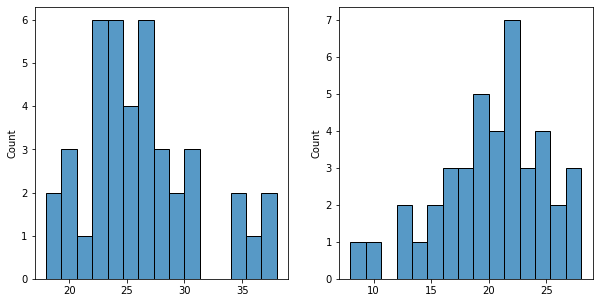

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize = (10,5))

ax = axs.flatten()

sns.histplot(scores_animals, bins=15, ax=ax[0])
sns.histplot(scores_professions, bins=15, ax=ax[1])

Text(0, 0.5, 'vft score professions')

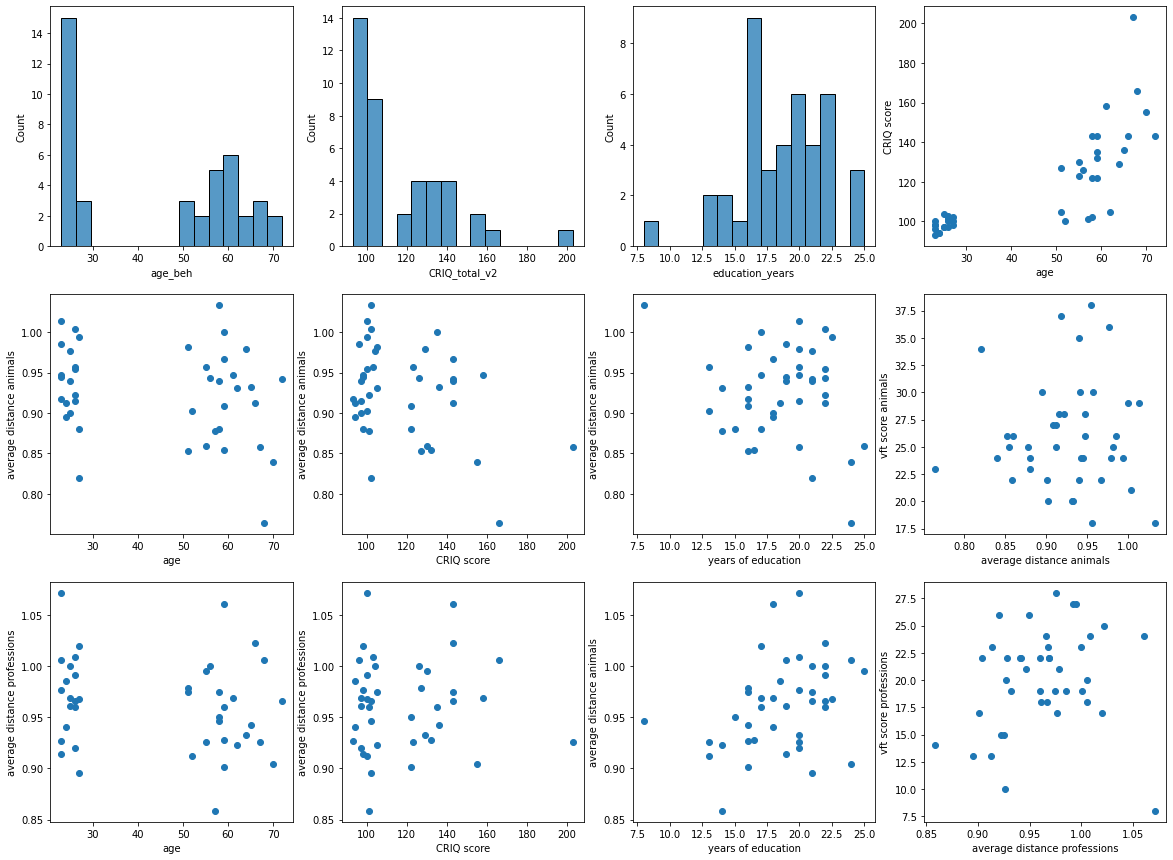

In [25]:
import seaborn as sns

fig, axs = plt.subplots(3, 4, figsize = (20,15))
ax = axs.flatten()

sns.histplot(vft_data['age_beh'], bins=15, ax=ax[0])
sns.histplot(vft_data['CRIQ_total_v2'], bins = 15, ax=ax[1])
sns.histplot(vft_data['education_years'], bins = 15, ax=ax[2])
ax[3].scatter(vft_data['age_beh'], vft_data['CRIQ_total_v2'])
ax[3].set_xlabel('age')
ax[3].set_ylabel('CRIQ score')


ax[4].scatter(vft_data['age_beh'], avg_distances_animals)
ax[4].set_xlabel('age')
ax[4].set_ylabel('average distance animals')

ax[5].scatter(vft_data['CRIQ_total_v2'], avg_distances_animals)
ax[5].set_xlabel('CRIQ score')
ax[5].set_ylabel('average distance animals')

ax[6].scatter(vft_data['education_years'], avg_distances_animals)
ax[6].set_xlabel('years of education')
ax[6].set_ylabel('average distance animals')

ax[7].scatter(avg_distances_animals, scores_animals)
ax[7].set_xlabel('average distance animals')
ax[7].set_ylabel('vft score animals')


ax[8].scatter(vft_data['age_beh'], avg_distances_professions)
ax[8].set_xlabel('age')
ax[8].set_ylabel('average distance professions')

ax[9].scatter(vft_data['CRIQ_total_v2'], avg_distances_professions)
ax[9].set_xlabel('CRIQ score')
ax[9].set_ylabel('average distance professions')

ax[10].scatter(vft_data['education_years'], avg_distances_professions)
ax[10].set_xlabel('years of education')
ax[10].set_ylabel('average distance animals')

ax[11].scatter(avg_distances_professions, scores_professions)
ax[11].set_xlabel('average distance professions')
ax[11].set_ylabel('vft score professions')

# Research Question 1

In [26]:
#multivariate regression using statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#age and CRIQ score predicting avg distance animals
X = vft_data[['age_beh', 'CRIQ_total_v2', 'education_years']]
y = avg_distances_animals
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     2.019
Date:                Thu, 18 Jan 2024   Prob (F-statistic):              0.128
Time:                        12:53:04   Log-Likelihood:                 63.180
No. Observations:                  41   AIC:                            -118.4
Df Residuals:                      37   BIC:                            -111.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0535      0.057     

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     3.092
Date:                Thu, 18 Jan 2024   Prob (F-statistic):             0.0570
Time:                        12:53:07   Log-Likelihood:                 63.164
No. Observations:                  41   AIC:                            -120.3
Df Residuals:                      38   BIC:                            -115.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0528      0.056     

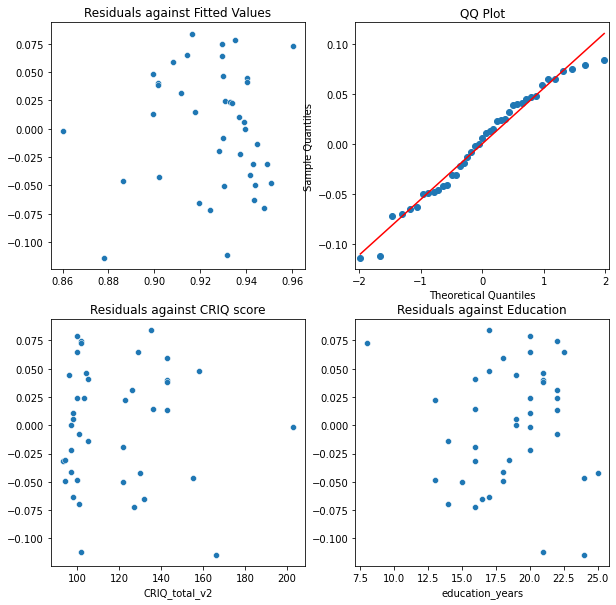

In [27]:
#eliminated variable with highest p-value (age)
X = vft_data[['CRIQ_total_v2', 'education_years']]
y = avg_distances_animals
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()

print(model.summary())

#VIFs
vifs = pd.DataFrame()
vifs["Variable"] = X.columns
vifs["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifs)

#Cook's distance
influence = model.get_influence()
cooks_d = influence.cooks_distance

max_cooks_index = np.argmax(cooks_d[0])
max_cooks_distance = cooks_d[0][max_cooks_index]
print('Max Cook\'s Distance:', max_cooks_distance)

#residual plots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.flatten()

residuals = model.resid
sns.scatterplot(x=model.fittedvalues, y=residuals, ax=ax[0])
ax[0].set_title('Residuals against Fitted Values')

sm.qqplot(residuals, line='r', ax=ax[1])
ax[1].set_title('QQ Plot')

sns.scatterplot(x=X['CRIQ_total_v2'], y=residuals, ax=ax[2])
ax[2].set_title('Residuals against CRIQ score')

sns.scatterplot(x=X['education_years'], y=residuals, ax=ax[3])
ax[3].set_title('Residuals against Education')

#for final plots
m1_fittedvalues = model.fittedvalues
m1_residuals = model.resid
m1_CRIq = X['CRIQ_total_v2']
m1_education = X['education_years']

In [28]:
#age and CRIQ score predicting avg distance animals
X = vft_data[['age_beh', 'CRIQ_total_v2', 'education_years']]
y = avg_distances_professions
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     2.214
Date:                Thu, 18 Jan 2024   Prob (F-statistic):              0.103
Time:                        12:53:17   Log-Likelihood:                 73.521
No. Observations:                  41   AIC:                            -139.0
Df Residuals:                      37   BIC:                            -132.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8911      0.044     

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     3.058
Date:                Thu, 18 Jan 2024   Prob (F-statistic):             0.0587
Time:                        12:53:20   Log-Likelihood:                 73.195
No. Observations:                  41   AIC:                            -140.4
Df Residuals:                      38   BIC:                            -135.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8989      0.043     

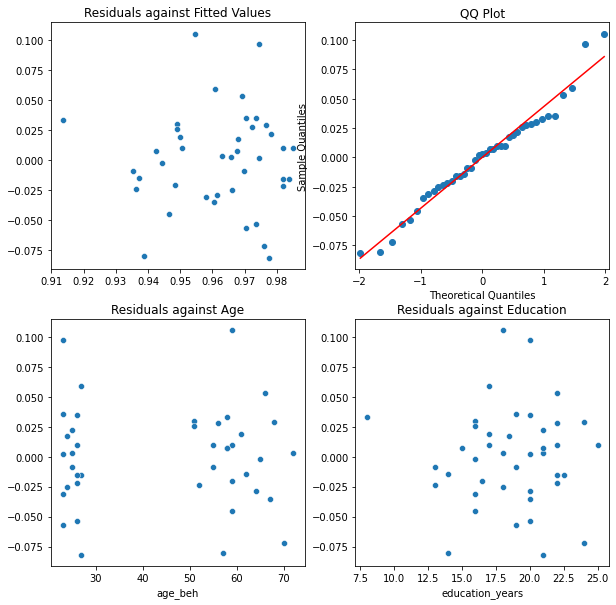

In [29]:
#eliminate variable with highest p-value (CRIq)
X = vft_data[['age_beh', 'education_years']]
y = avg_distances_professions
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()

print(model.summary())

#VIFs
vifs = pd.DataFrame()
vifs["Variable"] = X.columns
vifs["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifs)

#Cook's distance
influence = model.get_influence()
cooks_d = influence.cooks_distance

max_cooks_index = np.argmax(cooks_d[0])
max_cooks_distance = cooks_d[0][max_cooks_index]
print('Max Cook\'s Distance:', max_cooks_distance)

#residual plots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.flatten()

residuals = model.resid
sns.scatterplot(x=model.fittedvalues, y=residuals, ax=ax[0])
ax[0].set_title('Residuals against Fitted Values')

sm.qqplot(residuals, line='r', ax=ax[1])
ax[1].set_title('QQ Plot')

sns.scatterplot(x=X['age_beh'], y=residuals, ax=ax[2])
ax[2].set_title('Residuals against Age')

sns.scatterplot(x=X['education_years'], y=residuals, ax=ax[3])
ax[3].set_title('Residuals against Education')

#for final plots
m2_fittedvalues = model.fittedvalues
m2_residuals = model.resid
m2_age = X['age_beh']
m2_education = X['education_years']

# Research Question 2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2.680
Date:                Thu, 18 Jan 2024   Prob (F-statistic):             0.0470
Time:                        12:53:29   Log-Likelihood:                -117.50
No. Observations:                  41   AIC:                             245.0
Df Residuals:                      36   BIC:                             253.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.1698 

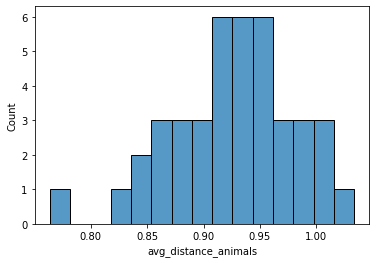

In [30]:
#age, criq, avg distance predicting vft score animals

vft_data['avg_distance_animals'] = np.array(avg_distances_animals)
sns.histplot(vft_data['avg_distance_animals'], bins=15)

X = vft_data[['age_beh', 'CRIQ_total_v2', 'education_years', 'avg_distance_animals']]
y = scores_animals
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     5.644
Date:                Thu, 18 Jan 2024   Prob (F-statistic):            0.00714
Time:                        12:53:32   Log-Likelihood:                -117.51
No. Observations:                  41   AIC:                             241.0
Df Residuals:                      38   BIC:                             246.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              21.2931      4.469     

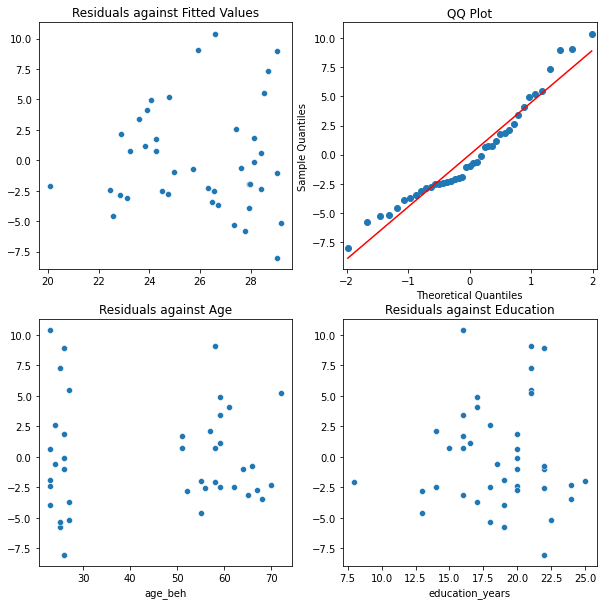

In [31]:
#eliminated avg distance and CRIq score
vft_data['avg_distance_animals'] = np.array(avg_distances_animals)
X = vft_data[['age_beh', 'education_years']]
y = scores_animals
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()

print(model.summary())

#VIFs
vifs = pd.DataFrame()
vifs["Variable"] = X.columns
vifs["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifs)

#Cook's distance
influence = model.get_influence()
cooks_d = influence.cooks_distance

max_cooks_index = np.argmax(cooks_d[0])
max_cooks_distance = cooks_d[0][max_cooks_index]
print('Max Cook\'s Distance:', max_cooks_distance)

#residual plots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.flatten()

residuals = model.resid
sns.scatterplot(x=model.fittedvalues, y=residuals, ax=ax[0])
ax[0].set_title('Residuals against Fitted Values')

sm.qqplot(residuals, line='r', ax=ax[1])
ax[1].set_title('QQ Plot')

sns.scatterplot(x=X['age_beh'], y=residuals, ax=ax[2])
ax[2].set_title('Residuals against Age')

sns.scatterplot(x=X['education_years'], y=residuals, ax=ax[3])
ax[3].set_title('Residuals against Education')

#for final plots
m3_fittedvalues = model.fittedvalues
m3_residuals = model.resid
m3_age = X['age_beh']
m3_education = X['education_years']

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.390
Date:                Thu, 18 Jan 2024   Prob (F-statistic):              0.257
Time:                        12:53:39   Log-Likelihood:                -117.03
No. Observations:                  41   AIC:                             244.1
Df Residuals:                      36   BIC:                             252.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

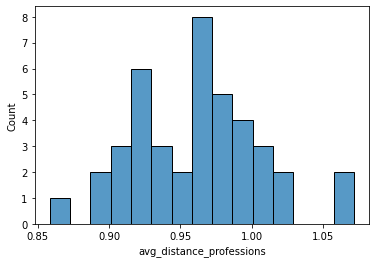

In [32]:
#age, criq, avg distance predicting vft score professions

vft_data['avg_distance_professions'] = np.array(avg_distances_professions)
sns.histplot(vft_data['avg_distance_professions'], bins=15)

X = vft_data[['age_beh', 'CRIQ_total_v2', 'education_years', 'avg_distance_professions']]
y = scores_professions
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     2.488
Date:                Thu, 18 Jan 2024   Prob (F-statistic):             0.0966
Time:                        12:53:43   Log-Likelihood:                -117.45
No. Observations:                  41   AIC:                             240.9
Df Residuals:                      38   BIC:                             246.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              10.6706      4.463     

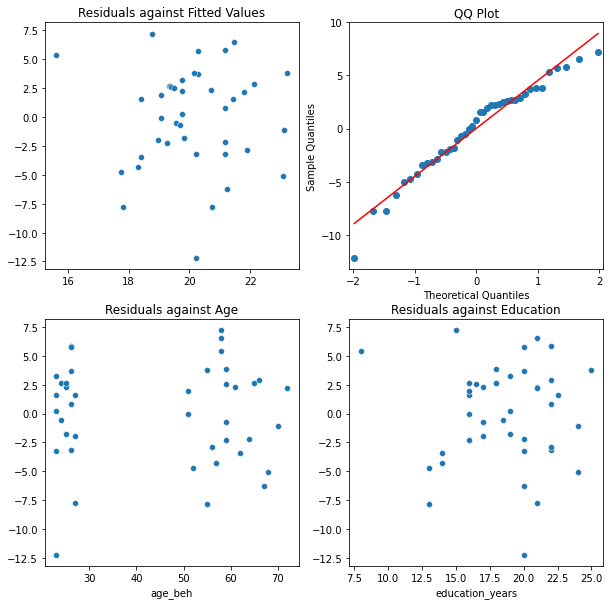

In [33]:
#eliminated CRIQ and avg distance
vft_data['avg_distance_professions'] = np.array(avg_distances_professions)
X = vft_data[['age_beh', 'education_years']]
y = scores_professions
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()

print(model.summary())

#VIFs
vifs = pd.DataFrame()
vifs["Variable"] = X.columns
vifs["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifs)

#Cook's distance
influence = model.get_influence()
cooks_d = influence.cooks_distance

max_cooks_index = np.argmax(cooks_d[0])
max_cooks_distance = cooks_d[0][max_cooks_index]
print('Max Cook\'s Distance:', max_cooks_distance)

#residual plots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.flatten()

residuals = model.resid
sns.scatterplot(x=model.fittedvalues, y=residuals, ax=ax[0])
ax[0].set_title('Residuals against Fitted Values')

sm.qqplot(residuals, line='r', ax=ax[1])
ax[1].set_title('QQ Plot')

sns.scatterplot(x=X['age_beh'], y=residuals, ax=ax[2])
ax[2].set_title('Residuals against Age')

sns.scatterplot(x=X['education_years'], y=residuals, ax=ax[3])
ax[3].set_title('Residuals against Education')

#for final plots
m4_fittedvalues = model.fittedvalues
m4_residuals = model.resid
m4_age = X['age_beh']
m4_education = X['education_years']

# Figures

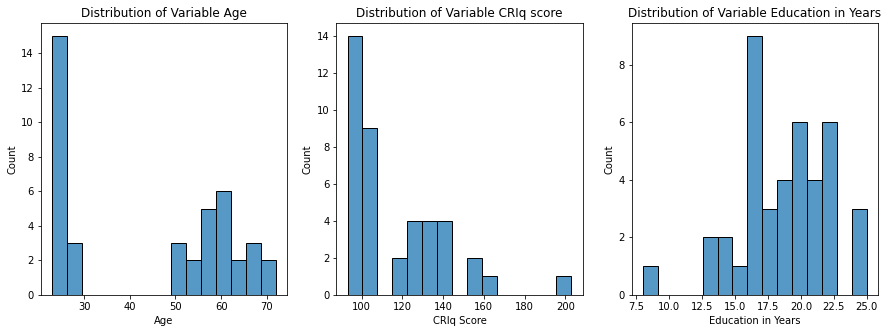

In [37]:
# distribution of predictors
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.flatten()

sns.histplot(vft_data['age_beh'], bins=15, ax=ax[0])
ax[0].set_xlabel('Age')
ax[0].set_title('Distribution of Variable Age')

sns.histplot(vft_data['CRIQ_total_v2'], bins = 15, ax=ax[1])
ax[1].set_xlabel('CRIq Score')
ax[1].set_title('Distribution of Variable CRIq score')

sns.histplot(vft_data['education_years'], bins = 15, ax=ax[2])
ax[2].set_xlabel('Education in Years')
ax[2].set_title('Distribution of Variable Education in Years')

plt.savefig('distr_predictors_fixed.svg')

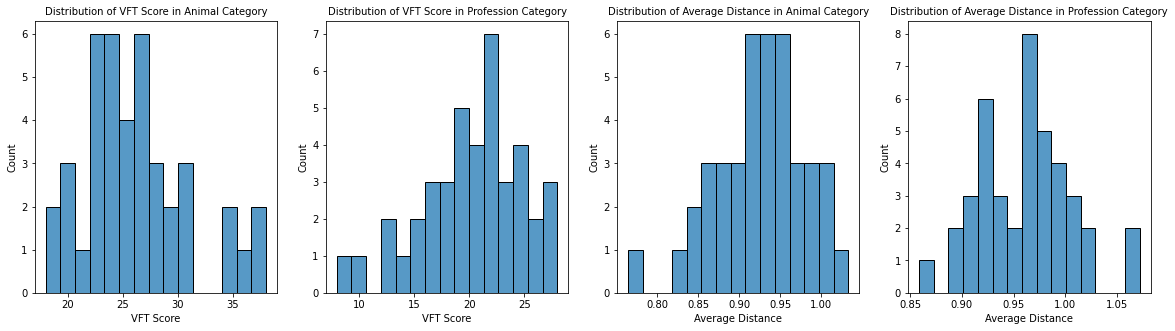

In [38]:
# distribution of predicted variables

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
ax = axes.flatten()

sns.histplot(scores_animals, bins=15, ax=ax[0])
ax[0].set_xlabel('VFT Score')
ax[0].set_title('Distribution of VFT Score in Animal Category', fontsize=10)

sns.histplot(scores_professions, bins=15, ax=ax[1])
ax[1].set_xlabel('VFT Score')
ax[1].set_title('Distribution of VFT Score in Profession Category', fontsize=10)

sns.histplot(vft_data['avg_distance_animals'], bins=15, ax=ax[2])
ax[2].set_xlabel('Average Distance')
ax[2].set_title('Distribution of Average Distance in Animal Category', fontsize=10)

sns.histplot(vft_data['avg_distance_professions'], bins=15, ax=ax[3])
ax[3].set_xlabel('Average Distance')
ax[3].set_title('Distribution of Average Distance in Profession Category', fontsize=10)

plt.savefig('distr_VFT_AD_fixed.svg')

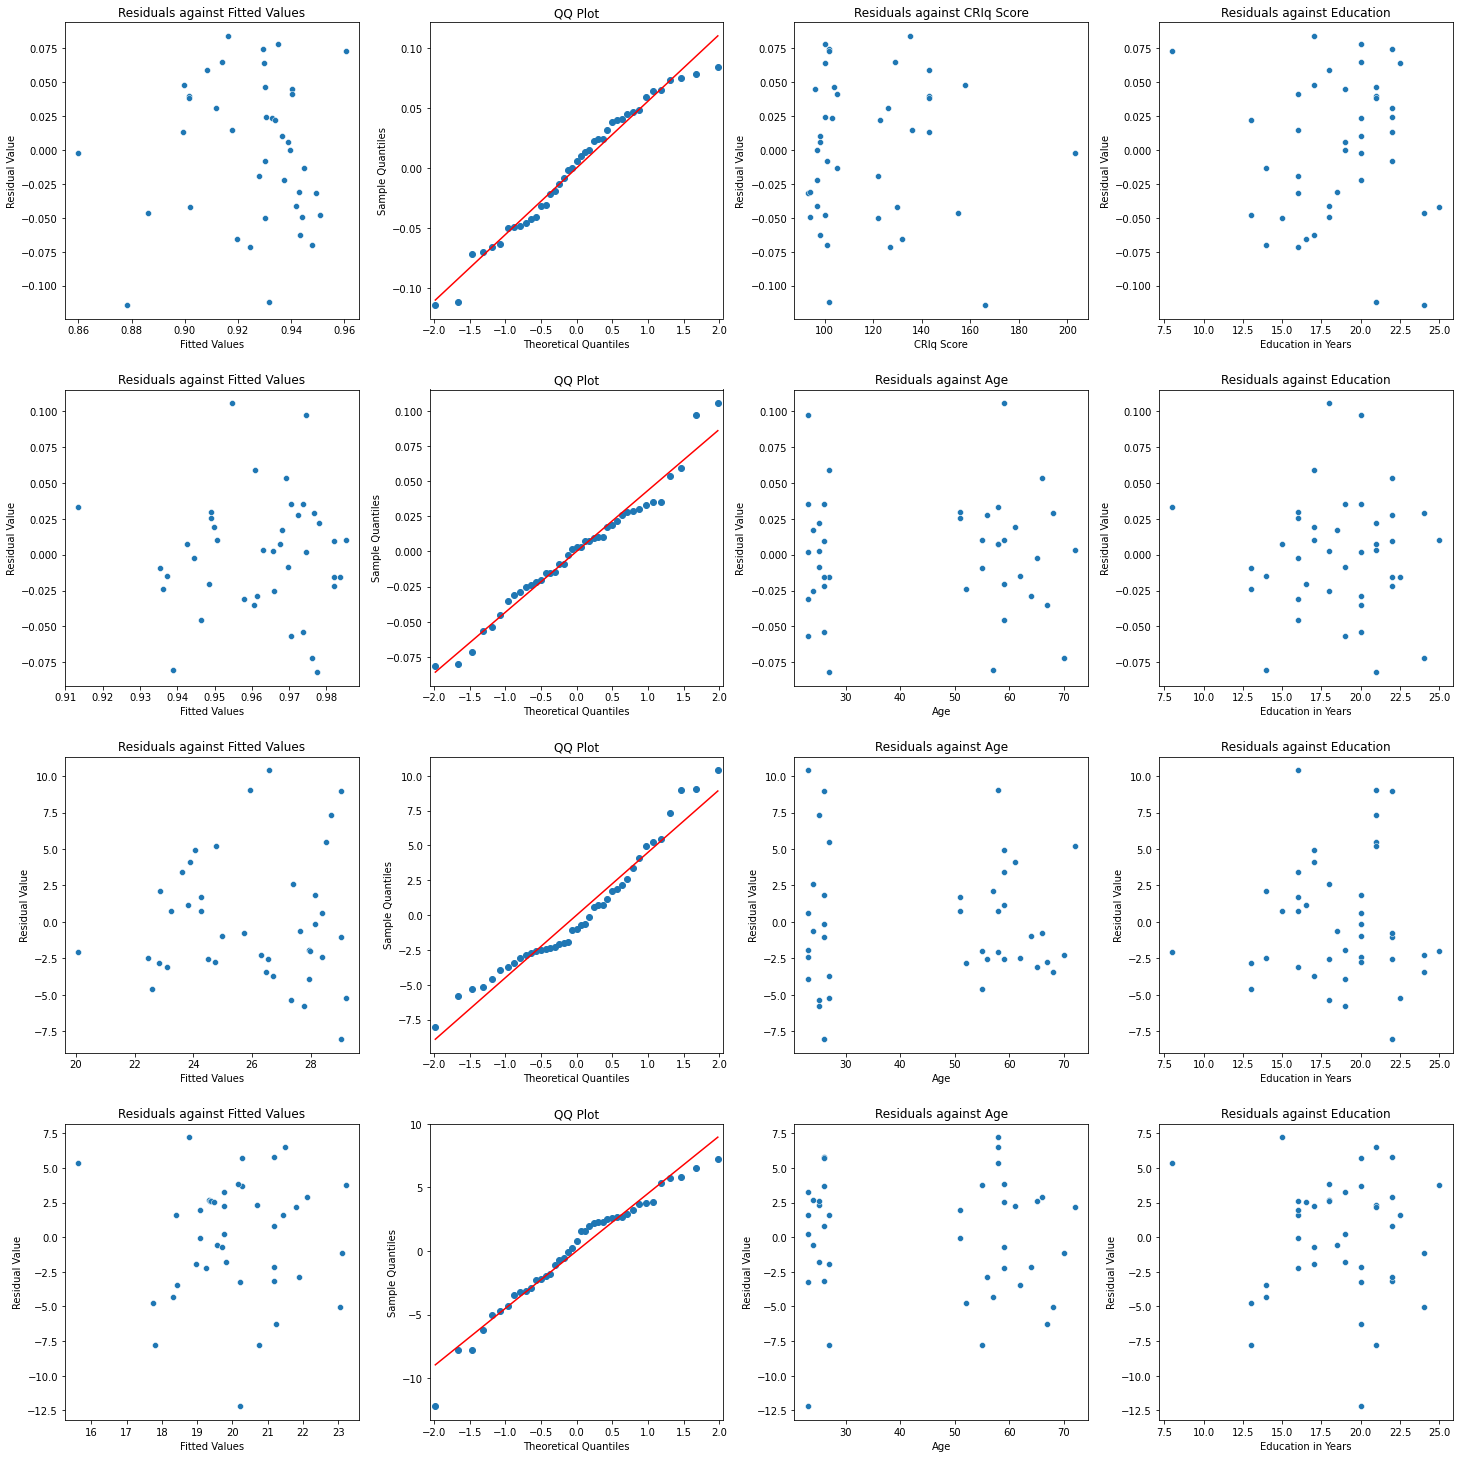

In [39]:
# residuals

fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.tight_layout(h_pad=5, w_pad=4)
ax = axes.flatten()

sns.scatterplot(x=m1_fittedvalues, y=m1_residuals, ax=ax[0])
ax[0].set_title('Residuals against Fitted Values')
ax[0].set_xlabel('Fitted Values')
ax[0].set_ylabel('Residual Value')

sm.qqplot(m1_residuals, line='r', ax=ax[1])
ax[1].set_title('QQ Plot')

sns.scatterplot(x=m1_CRIq, y=m1_residuals, ax=ax[2])
ax[2].set_title('Residuals against CRIq Score')
ax[2].set_xlabel('CRIq Score')
ax[2].set_ylabel('Residual Value')

sns.scatterplot(x=m1_education, y=m1_residuals, ax=ax[3])
ax[3].set_title('Residuals against Education')
ax[3].set_xlabel('Education in Years')
ax[3].set_ylabel('Residual Value')

#---------------------------------------------------------------------------------------------

sns.scatterplot(x=m2_fittedvalues, y=m2_residuals, ax=ax[4])
ax[4].set_title('Residuals against Fitted Values')
ax[4].set_xlabel('Fitted Values')
ax[4].set_ylabel('Residual Value')

sm.qqplot(m2_residuals, line='r', ax=ax[5])
ax[5].set_title('QQ Plot')

sns.scatterplot(x=m2_age, y=m2_residuals, ax=ax[6])
ax[6].set_title('Residuals against Age')
ax[6].set_xlabel('Age')
ax[6].set_ylabel('Residual Value')

sns.scatterplot(x=m2_education, y=m2_residuals, ax=ax[7])
ax[7].set_title('Residuals against Education')
ax[7].set_xlabel('Education in Years')
ax[7].set_ylabel('Residual Value')

#---------------------------------------------------------------------------------------------

sns.scatterplot(x=m3_fittedvalues, y=m3_residuals, ax=ax[8])
ax[8].set_title('Residuals against Fitted Values')
ax[8].set_xlabel('Fitted Values')
ax[8].set_ylabel('Residual Value')

sm.qqplot(m3_residuals, line='r', ax=ax[9])
ax[9].set_title('QQ Plot')

sns.scatterplot(x=m3_age, y=m3_residuals, ax=ax[10])
ax[10].set_title('Residuals against Age')
ax[10].set_xlabel('Age')
ax[10].set_ylabel('Residual Value')

sns.scatterplot(x=m3_education, y=m3_residuals, ax=ax[11])
ax[11].set_title('Residuals against Education')
ax[11].set_xlabel('Education in Years')
ax[11].set_ylabel('Residual Value')

#---------------------------------------------------------------------------------------------

sns.scatterplot(x=m4_fittedvalues, y=m4_residuals, ax=ax[12])
ax[12].set_title('Residuals against Fitted Values')
ax[12].set_xlabel('Fitted Values')
ax[12].set_ylabel('Residual Value')

sm.qqplot(m4_residuals, line='r', ax=ax[13])
ax[13].set_title('QQ Plot')

sns.scatterplot(x=m4_age, y=m4_residuals, ax=ax[14])
ax[14].set_title('Residuals against Age')
ax[14].set_xlabel('Age')
ax[14].set_ylabel('Residual Value')

sns.scatterplot(x=m4_education, y=m4_residuals, ax=ax[15])
ax[15].set_title('Residuals against Education')
ax[15].set_xlabel('Education in Years')
ax[15].set_ylabel('Residual Value')

plt.savefig('residuals_fixed.svg')